##  ライブラリー、データの読み込み

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_gender = pd.read_csv("gender_submission.csv")
all_data = pd.concat([df_train, df_test], axis=0)

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


###  文字列を数値に置き換える。カテゴリー化

In [6]:
# 文字列を数字に置き換える
# sex            male⇒0, female⇒1
# Embarked       C ⇒0, S⇒1, Q⇒2

all_data["Sex"] = all_data["Sex"].apply(lambda x: 0 if x == "male" else 1 )

Embarked_dict = {"C":0, "S":1, "Q":2}
all_data["Embarked"] = all_data["Embarked"].map(Embarked_dict)

In [10]:
# Ticketをカテゴリー化

all_data["Ticket_category"] = all_data["Ticket"].apply(lambda x: x[0:3])
all_data["Ticket_category"] = all_data["Ticket_category"].astype("category")
all_data["Ticket_category"] = all_data["Ticket_category"].cat.codes

df_train=all_data.iloc[:891, :]

##  データを視覚化

In [13]:
all_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_category
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1.0,139
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0.0,154
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0,165
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1.0,3
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1.0,108
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,NaN,1.0,137
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,0.0,154
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,1.0,164
416,1308,NaN,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,NaN,1.0,96


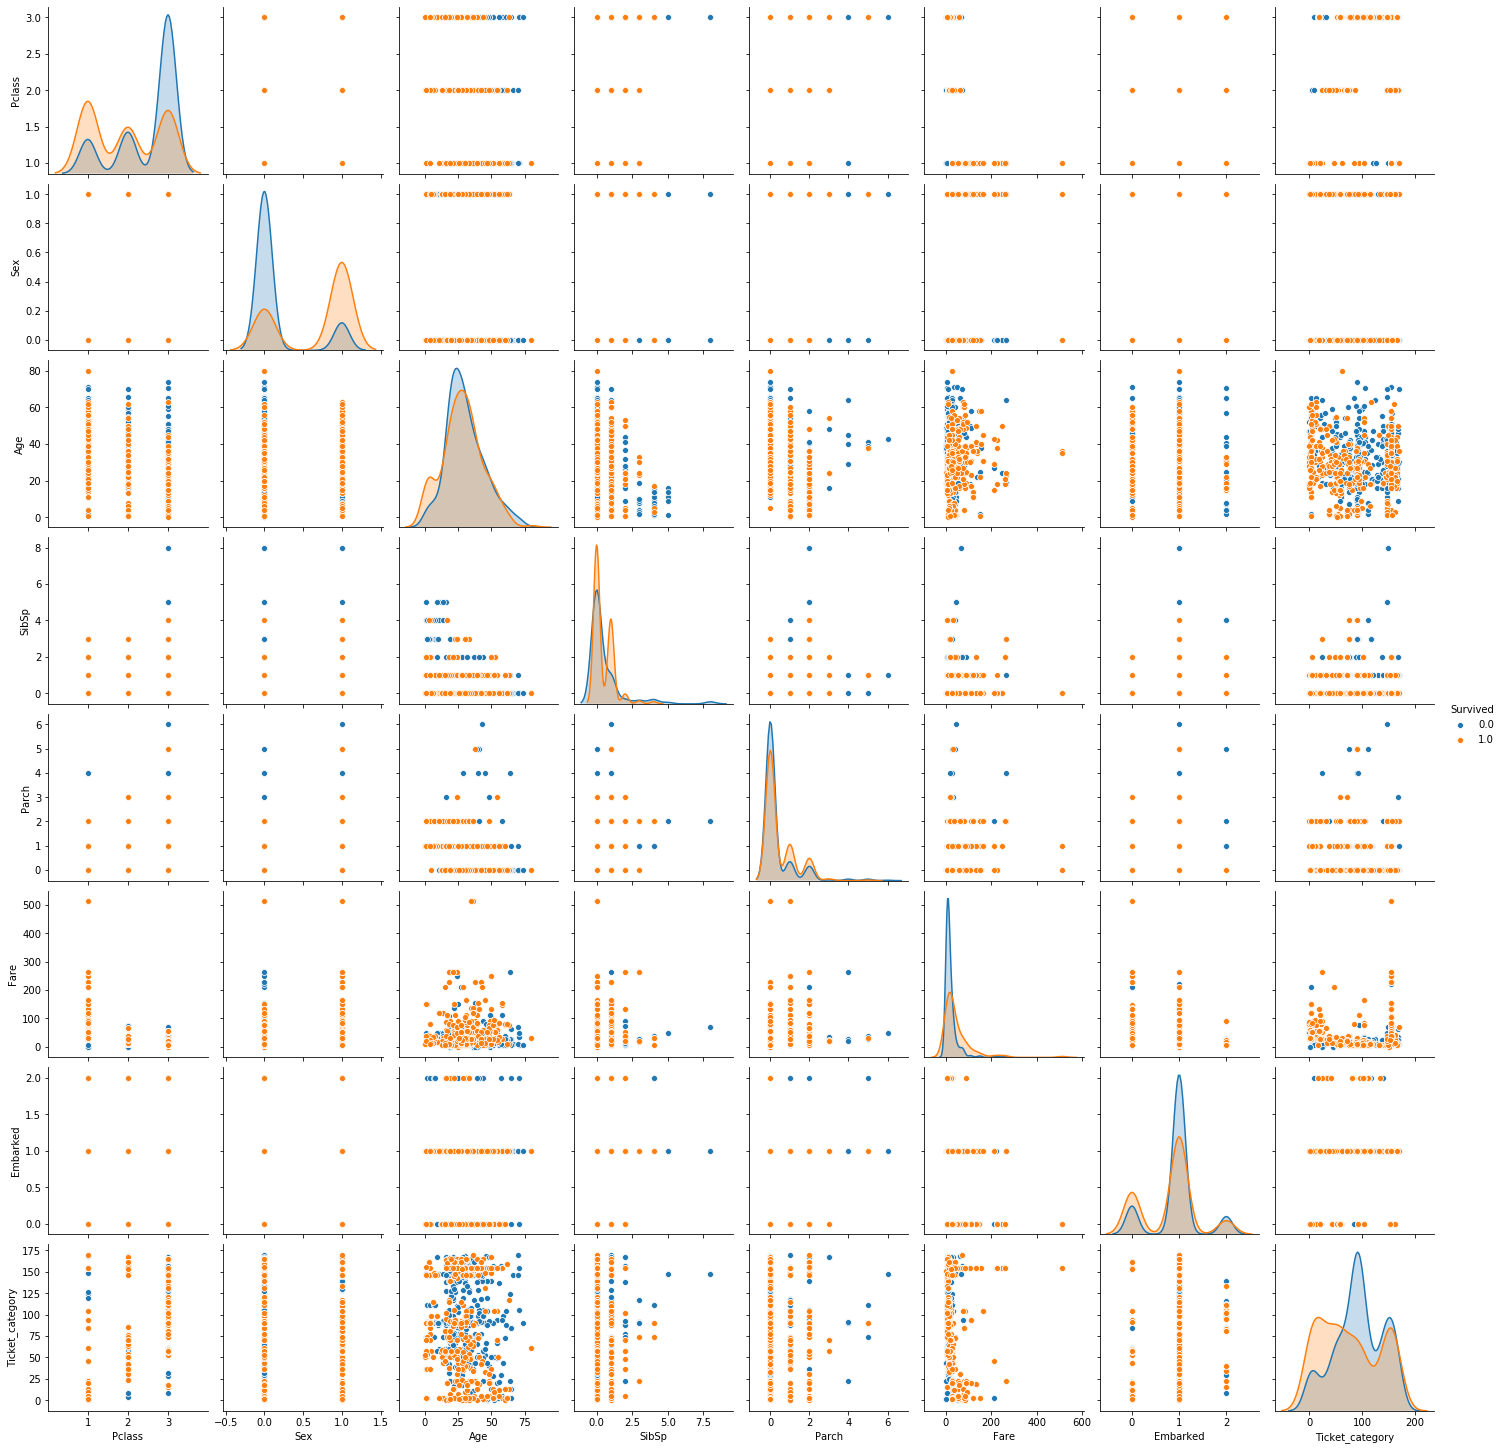

In [12]:
sns.pairplot(df_train[["Pclass", "Survived", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "Ticket_category"]], hue="Survived")

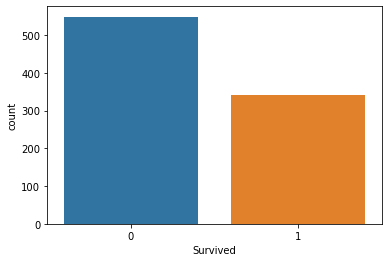

In [282]:
sns.countplot(df_train["Survived"])

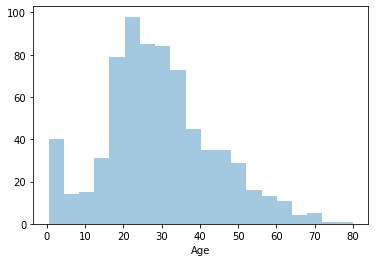

In [283]:
sns.distplot(df_train["Age"], kde=False)

In [284]:
df_train[["Survived","Cabin"]].groupby("Survived").describe()

Cabin                     
         count unique      top freq
Survived                           
0           68     62     C124    2
1          136    101  B96 B98    4

##  データの前処理

###  欠損値処理("Embarked")

In [14]:
all_data[all_data["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_category
61,62,1.0,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN,3
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN,3


In [15]:
all_data["Embarked"].value_counts()

1.0    914
0.0    270
2.0    123
Name: Embarked, dtype: int64

In [16]:
all_data["Embarked"] = all_data["Embarked"].fillna(1)

In [17]:
all_data["Embarked"].value_counts()

1.0    916
0.0    270
2.0    123
Name: Embarked, dtype: int64

###  欠損値処理("Age")

In [18]:
all_data[all_data["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_category
5,6,0.0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,2.0,81
17,18,1.0,2,"Williams, Mr. Charles Eugene",0,NaN,0,0,244373,13.0000,NaN,1.0,49
19,20,1.0,3,"Masselmani, Mrs. Fatima",1,NaN,0,0,2649,7.2250,NaN,0.0,55
26,27,0.0,3,"Emir, Mr. Farred Chehab",0,NaN,0,0,2631,7.2250,NaN,0.0,54
28,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",1,NaN,0,0,330959,7.8792,NaN,2.0,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",1,NaN,0,0,334915,7.7208,NaN,2.0,82
410,1302,NaN,3,"Naughton, Miss. Hannah",1,NaN,0,0,365237,7.7500,NaN,2.0,100
413,1305,NaN,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,NaN,1.0,137
416,1308,NaN,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,NaN,1.0,96


In [19]:
#Ageが欠損している人についての名前
all_data[all_data["Age"].isnull()]["Name"].apply(lambda x:x.split(",")[1].split(".")[0].replace(" ","" )).value_counts()

Mr        176
Miss       50
Mrs        27
Master      8
Ms          1
Dr          1
Name: Name, dtype: int64

In [20]:
#全員の名前
all_data["Name"].apply(lambda x: x.split(",")[1].split(".")[0].replace(" ","" )).value_counts()

Mr             757
Miss           260
Mrs            197
Master          61
Dr               8
Rev              8
Col              4
Major            2
Mlle             2
Ms               2
Sir              1
Lady             1
Don              1
Capt             1
Mme              1
Jonkheer         1
theCountess      1
Dona             1
Name: Name, dtype: int64

## ↑名前から年齢を予測してみる

In [21]:
all_data["Name_"] = all_data["Name"].apply(lambda x: x.split(",")[1].split(".")[0].replace(" ","" ))

In [22]:
# Mrの年齢層
print(all_data[all_data["Name_"].values == "Mr"]["Age"].describe())
print("median=", all_data[all_data["Name_"].values == "Mr"]["Age"].median())
age_Mr = all_data[all_data["Name_"].values == "Mr"]["Age"].median()
#29歳程度だとわかる

count    581.000000
mean      32.252151
std       12.422089
min       11.000000
25%       23.000000
50%       29.000000
75%       39.000000
max       80.000000
Name: Age, dtype: float64
median= 29.0


In [23]:
# Missの年齢層
print(all_data[all_data["Name_"].values == "Miss"]["Age"].describe())
print("median=", all_data[all_data["Name_"].values == "Miss"]["Age"].median())

#22歳程度だとわかる

count    210.000000
mean      21.774238
std       12.249077
min        0.170000
25%       15.000000
50%       22.000000
75%       30.000000
max       63.000000
Name: Age, dtype: float64
median= 22.0


In [24]:
# Mrsの年齢層
print(all_data[all_data["Name_"].values == "Mrs"]["Age"].describe())
print("median=", all_data[all_data["Name_"].values == "Mrs"]["Age"].median())

#36歳程度だとわかる

count    170.000000
mean      36.994118
std       12.901767
min       14.000000
25%       27.000000
50%       35.500000
75%       46.500000
max       76.000000
Name: Age, dtype: float64
median= 35.5


In [25]:
# Masterの年齢層
print(all_data[all_data["Name_"].values == "Master"]["Age"].describe())
print("median=", all_data[all_data["Name_"].values == "Master"]["Age"].median())

#5歳程度だとわかる

count    53.000000
mean      5.482642
std       4.161554
min       0.330000
25%       2.000000
50%       4.000000
75%       9.000000
max      14.500000
Name: Age, dtype: float64
median= 4.0


In [26]:
# Drの年齢層
print(all_data[all_data["Name_"].values == "Dr"]["Age"].describe())
print("median=", all_data[all_data["Name_"].values == "Dr"]["Age"].median())

#49歳程度だとわかる

count     7.000000
mean     43.571429
std      11.731115
min      23.000000
25%      38.000000
50%      49.000000
75%      51.500000
max      54.000000
Name: Age, dtype: float64
median= 49.0


In [27]:
# Msの年齢層
print(all_data[all_data["Name_"].values == "Ms"]["Age"].describe())
print("median=", all_data[all_data["Name_"].values == "Ms"]["Age"].median())

#49歳程度だとわかる

count     1.0
mean     28.0
std       NaN
min      28.0
25%      28.0
50%      28.0
75%      28.0
max      28.0
Name: Age, dtype: float64
median= 28.0


In [28]:
#各名前の中間値をリスト化する
agelack_name = all_data[all_data["Age"].isnull()]["Name"].apply(lambda x:x.split(",")[1].split(".")[0].replace(" ","" )).value_counts().index
age_med_list = []
for idx, i in enumerate(agelack_name):
    age_med_list.append(all_data[all_data["Name_"].values == i]["Age"].median())
print(agelack_name)
age_med_list

Index(['Mr', 'Miss', 'Mrs', 'Master', 'Ms', 'Dr'], dtype='object')


[29.0, 22.0, 35.5, 4.0, 28.0, 49.0]

##  ★ここから　Name_情報から中間値をAgeに代入する

In [29]:
for idx, i in enumerate(agelack_name):
    all_data["Age"] = all_data.apply(lambda x: age_med_list[idx] if x["Name_"] == i and np.isnan(x["Age"])  else x["Age"], axis=1)
all_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_category,Name_
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1.0,139,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0.0,154,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0,165,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1.0,3,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1.0,108,Mr


In [30]:
all_data[all_data["Age"].isnull()] #Age列の欠損値がなくなった

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_category,Name_


In [31]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      1309 non-null   int64  
 1   Survived         891 non-null    float64
 2   Pclass           1309 non-null   int64  
 3   Name             1309 non-null   object 
 4   Sex              1309 non-null   int64  
 5   Age              1309 non-null   float64
 6   SibSp            1309 non-null   int64  
 7   Parch            1309 non-null   int64  
 8   Ticket           1309 non-null   object 
 9   Fare             1308 non-null   float64
 10  Cabin            295 non-null    object 
 11  Embarked         1309 non-null   float64
 12  Ticket_category  1309 non-null   int16  
 13  Name_            1309 non-null   object 
dtypes: float64(4), int16(1), int64(5), object(4)
memory usage: 185.7+ KB


##  欠損値処理（"Fare"）

In [33]:
all_data[all_data["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_category,Name_
152,1044,NaN,3,"Storey, Mr. Thomas",0,60.5,0,0,3701,NaN,NaN,1.0,105,Mr


In [32]:
all_data.groupby("Pclass").median()["Fare"]

Pclass
1    60.0000
2    15.0458
3     8.0500
Name: Fare, dtype: float64

In [34]:
all_data["Fare"] = all_data["Fare"].apply(lambda x: all_data.groupby("Pclass").median()["Fare"][3] if np.isnan(x) else x)

In [35]:
all_data[all_data["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_category,Name_


In [36]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      1309 non-null   int64  
 1   Survived         891 non-null    float64
 2   Pclass           1309 non-null   int64  
 3   Name             1309 non-null   object 
 4   Sex              1309 non-null   int64  
 5   Age              1309 non-null   float64
 6   SibSp            1309 non-null   int64  
 7   Parch            1309 non-null   int64  
 8   Ticket           1309 non-null   object 
 9   Fare             1309 non-null   float64
 10  Cabin            295 non-null    object 
 11  Embarked         1309 non-null   float64
 12  Ticket_category  1309 non-null   int16  
 13  Name_            1309 non-null   object 
dtypes: float64(4), int16(1), int64(5), object(4)
memory usage: 185.7+ KB


##  学習させる

In [94]:
from sklearn.model_selection import train_test_split

X = all_data.iloc[:891,:][["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "Ticket_category"]]
y = all_data.iloc[:891,:]["Survived"]
X_val = all_data.iloc[891:,:][["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "Ticket_category"]]
y_val = all_data.iloc[891:,:]["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

##  RandomForestで実装

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [96]:
params = {"n_estimators":[i for i in range(1, 102, 10)],
         "criterion":["gini", "entropy"],
         "max_depth":[i for i in range(1,6)],
         }

gs = GridSearchCV(clf, params)
gs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [1, 11, 21, 31, 41, 51, 61, 71, 81, 91,
                                          101]})

In [97]:
gs.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 91}

In [98]:
gs.score(X_test, y_test)

0.8603351955307262

In [99]:
gs.predict(X_val)

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [105]:
df_test["Survived"] = gs.predict(X_val)
submit = df_test[["PassengerId", "Survived"]]
submit.to_csv("Submit_Prediction_byiCO.csv", index=False)

##  LightGBMで実装

In [74]:
import lightgbm as lgb
#訓練・テストデータの設定
clf = lgb.LGBMClassifier()

In [82]:
params= {"n_estimators":[i for i in range(1,102, 10)],
         "learning_rate":[0.01, 0.05, 0.1],
         "num_leaves":[7, 15, 31],
         "max_depth":[1,2,3,4,5]
        }

#訓練させる
gs = GridSearchCV(clf, params)
gs.fit(X_train, y_train)

[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max

GridSearchCV(estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [1, 11, 21, 31, 41, 51, 61, 71, 81, 91,
                                          101],
                         'num_leaves': [7, 15, 31]})

In [83]:
gs.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 71, 'num_leaves': 31}

In [84]:
gs.score(X_test, y_test)

0.8414634146341463

##  MLPで実装

In [65]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier()

In [70]:
alpha_list = [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e2, 1e3]
hidden_layer = [(100,),
                (100, 10),
                (100, 100, 10),
                (100, 100, 100, 10),
                (100, 100, 100, 100, 10),
                (100, 100, 100, 100, 100, 10)]


params = {"alpha": alpha_list,
          "hidden_layer_sizes":hidden_layer,
         }

gs = GridSearchCV(clf, params)
gs.fit(X_train, y_train)

C:\Users\takas\anaconda3\envs\keras_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\takas\anaconda3\envs\keras_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\takas\anaconda3\envs\keras_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\takas\anaconda3\envs\keras_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and th

GridSearchCV(estimator=MLPClassifier(),
             param_grid={'alpha': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001,
                                   0.01, 0.1, 1, 100.0, 1000.0],
                         'hidden_layer_sizes': [(100,), (100, 10),
                                                (100, 100, 10),
                                                (100, 100, 100, 10),
                                                (100, 100, 100, 100, 10),
                                                (100, 100, 100, 100, 100, 10)]})

In [71]:
gs.best_params_

{'alpha': 1e-06, 'hidden_layer_sizes': (100,)}

In [72]:
gs.score(X_test, y_test)

0.8170731707317073